In [1]:
from laplacian_eigenmaps import *

from gensim.models import KeyedVectors
from gensim.test.utils import datapath

%load_ext autoreload
%autoreload 2

In [27]:
from tempfile import TemporaryFile
outfile = TemporaryFile()

# Swiss-roll

In [2]:
# n_samples = 100000
n_samples = 20000
# reduce number of points for plotting
# n_samples_plot = 1000
# idx_plot = np.random.permutation(n_samples)[0:n_samples_plot]

## create swiss-roll and my method

In [3]:
np.random.seed(42)
points, color = make_swiss_roll(n_samples)

In [8]:
my_embed_spectral = my_le(points, 9)
plot_results(my_embed_spectral[:,1:], color)

KeyboardInterrupt: 

## Part 1 Swiss-roll Data set embedding using sklearn LE

In [4]:
sklearn_embed_spectral = sklearn_le(points, 10)
plot_results(sklearn_embed_spectral, color)

## Part 2 Swiss-roll Data set embedding using Megaman

In [22]:
megaman_embed_spectral = megaman_le(points, 2)
# plot_results(megaman_embed_spectral, color)

/Users/liborui/opt/anaconda3/envs/manifold_env/lib/python3.5/site-packages/sklearn/utils/validation.py:457: DeprecationWarning: Passing 'None' to parameter 'accept_sparse' in methods check_array and check_X_y is deprecated in version 0.19 and will be removed in 0.21. Use 'accept_sparse=False'  instead.
  " instead.", DeprecationWarning)
/Users/liborui/opt/anaconda3/envs/manifold_env/lib/python3.5/site-packages/megaman/geometry/adjacency.py:126: RuntimeWarning: invalid value encountered in sqrt
  return cyindex.radius_neighbors_graph(X, self.radius, **self.check_kwds)


3.5373940467834473


# save data to .npy file

In [33]:
np.save(outfile, points)
with open('se_input.npy', 'wb') as f:
    np.save(f, points)

In [ ]:
with open('se_label.npy', 'wb') as f:
    np.save(f, megaman_embed_spectral)

# Word2vec

In [134]:
google_news_300_vectors = KeyedVectors.load_word2vec_format(datapath(r"/Users/liborui/gensim-data/GoogleNews-vectors-negative300.bin"), binary=True)
vecs = google_news_300_vectors.vectors


/Users/liborui/opt/anaconda3/envs/manifold_env/lib/python3.5/site-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
sklearn_embed_spectral_w2v = sklearn_le(vecs[:5000,:], 100)

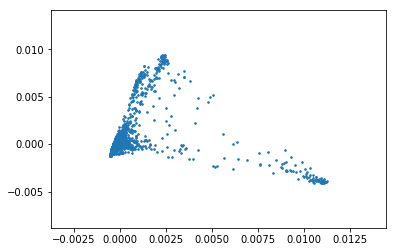

In [ ]:
plt.scatter(sklearn_embed_spectral_w2v[:,0],sklearn_embed_spectral_w2v[:,1],s=2.5)

In [137]:
megaman_embed_spectral_w2v = megaman_le(vecs, 100)

/Users/liborui/opt/anaconda3/envs/manifold_env/lib/python3.5/site-packages/sklearn/utils/validation.py:457: DeprecationWarning: Passing 'None' to parameter 'accept_sparse' in methods check_array and check_X_y is deprecated in version 0.19 and will be removed in 0.21. Use 'accept_sparse=False'  instead.
  " instead.", DeprecationWarning)
